# Bioinformatics 1, Lecture 6
# MSA and phylogenetics


# Part 1: MSA

In [1]:
%pylab inline

# import required Biophython functions 
from Bio import Entrez
from Bio.Blast import NCBIXML
from Bio.Blast import NCBIWWW
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO
from Bio.Align import AlignInfo
from Bio import SubsMat


Populating the interactive namespace from numpy and matplotlib


### first obtain the sequence identifier for your chosen gene from the NCBI database
Note here we work with protein sequences, so make sure you get the protein entry:
go to 'Reference Sequence' and choose the entry beginning with NP_

In [7]:
Entrez.email = 'A.N.Other@example.com'

# example is based on the blue cone opsin, human
my_protein = 'NP_001096.1' 

handle = Entrez.efetch(db="protein", id=my_protein, rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()

In [9]:
# show the sequence record
# here we have choosen the FOP gene
print(record)

ID: NP_001096.1
Name: NP_001096
Description: activin receptor type-1 precursor [Homo sapiens]
Number of features: 15
/comment=REVIEWED REFSEQ: This record has been curated by NCBI staff. The
reference sequence was derived from BC033867.1, L02911.1 and
AC013731.10.
This sequence is a reference standard in the RefSeqGene project.
Summary: Activins are dimeric growth and differentiation factors
which belong to the transforming growth factor-beta (TGF-beta)
superfamily of structurally related signaling proteins. Activins
signal through a heteromeric complex of receptor serine kinases
which include at least two type I ( I and IB) and two type II (II
and IIB) receptors. These receptors are all transmembrane proteins,
composed of a ligand-binding extracellular domain with
cysteine-rich region, a transmembrane domain, and a cytoplasmic
domain with predicted serine/threonine specificity. Type I
receptors are essential for signaling; and type II receptors are
required for binding ligands and for

## run a BLAST via the web

In [10]:
result_handle = NCBIWWW.qblast('blastp', 'swissprot', record.seq)
# This may take some time to run

In [11]:
# parse the results
result_handle.seek(0)
blast_record = NCBIXML.read(result_handle)

## print some information on the BLAST hits

To see the data structure for the results, go here:
[http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc94]    

In [12]:
print('Gene name\te-value\tscore')
for a in blast_record.alignments:
    print(a.title.split('|')[4].split(' ')[0]+'\t'+str(a.hsps[0].expect)+'\t'+str( a.hsps[0].score))


Gene name	e-value	score
ACVR1_HUMAN	0.0	2750.0
ACVR1_BOVIN	0.0	2726.0
ACVR1_MOUSE	0.0	2715.0
ACVR1_RAT	0.0	2695.0
ACVR1_CHICK	0.0	2231.0
ACVL1_MOUSE	0.0	1508.0
ACVL1_HUMAN	0.0	1480.0
ACVL1_PONAB	0.0	1480.0
ACVL1_RAT	0.0	1463.0
TGFR1_RAT	1.44956e-158	1190.0
TGFR1_HUMAN	2.10125e-158	1189.0
TGFR1_BOVIN	9.70972e-158	1185.0
TGFR1_PIG	2.17744e-157	1183.0
TGFR1_MOUSE	2.79622e-157	1182.0
ACV1C_MOUSE	3.06114e-157	1181.0
BMR1B_CHICK	9.65312e-157	1178.0
ACV1C_RAT	9.90899e-157	1177.0
ACV1C_HUMAN	1.17925e-156	1177.0
BMR1B_MOUSE	1.11728e-154	1165.0
BMR1B_HUMAN	2.55256e-154	1162.0
BMR1A_HUMAN	6.14397e-154	1163.0
BMR1A_MOUSE	1.40291e-152	1154.0
BMR1A_RAT	1.00169e-151	1148.0
ACV1B_HUMAN	3.79938e-150	1135.0
ACV1B_MOUSE	1.17595e-149	1132.0
ACV1B_RAT	1.61181e-148	1124.0
SMA6_CAEEL	3.64722e-78	663.0
AVR2B_XENLA	3.32693e-71	607.0
DAF1_CAEEL	2.19137e-70	612.0
AVR2B_CHICK	4.91205e-69	592.0
AVR2B_HUMAN	1.22686e-65	569.0
AVR2A_XENLA	1.31175e-65	569.0
AVR2B_MOUSE	3.74746e-65	567.0
AVR2B_BOVIN	3.96702e-65	566.0
A

In [13]:
# read the full ncbi entries
a=blast_record.alignments[0]
sp_ids = []
for a in blast_record.alignments:
    sp_ids.append(a.title.split('|')[3])
# print(",".join(sp_ids))
handle = Entrez.efetch(db="protein", id=",".join(sp_ids), retmode="xml")#, rettype='gb')
data = Entrez.read(handle)
species = []
print('Alignment score\tSpecies')
for i,d in enumerate(data):
    species.append(d['GBSeq_source'])
    print(str(blast_record.alignments[i].hsps[0].score)+'\t'+d['GBSeq_source'])

Alignment score	Species
2750.0	Homo sapiens (human)
2726.0	Bos taurus (cattle)
2715.0	Mus musculus (house mouse)
2695.0	Rattus norvegicus (Norway rat)
2231.0	Gallus gallus (chicken)
1508.0	Mus musculus (house mouse)
1480.0	Homo sapiens (human)
1480.0	Pongo abelii (Sumatran orangutan)
1463.0	Rattus norvegicus (Norway rat)
1190.0	Rattus norvegicus (Norway rat)
1189.0	Homo sapiens (human)
1185.0	Bos taurus (cattle)
1183.0	Sus scrofa (pig)
1182.0	Mus musculus (house mouse)
1181.0	Mus musculus (house mouse)
1178.0	Gallus gallus (chicken)
1177.0	Rattus norvegicus (Norway rat)
1177.0	Homo sapiens (human)
1165.0	Mus musculus (house mouse)
1162.0	Homo sapiens (human)
1163.0	Homo sapiens (human)
1154.0	Mus musculus (house mouse)
1148.0	Rattus norvegicus (Norway rat)
1135.0	Homo sapiens (human)
1132.0	Mus musculus (house mouse)
1124.0	Rattus norvegicus (Norway rat)
663.0	Caenorhabditis elegans
607.0	Xenopus laevis (African clawed frog)
612.0	Caenorhabditis elegans
592.0	Gallus gallus (chicken)
56

In [14]:
# data now contains the full information about every gene:
data[1]

{u'GBSeq_moltype': 'AA', u'GBSeq_source': 'Bos taurus (cattle)', u'GBSeq_sequence': 'mvdgvmilpvlvmiafpfpsmedekpkvnpklymcvceglscgdeahcegqqcfsslsindgfhvyqkgcfqvyeqgkmtcktppspgqaveccqgdwcnrnitaqlptkgksfpgtqnfhlevgliilsvvfavcllacllgvalrkfkrrnqerlnprdveygtieglittnvgdstladlldhsctsgsgsglpflvqrtvarqitllecvgkgrygevwrgswqgenvavkifssrdekswfretelyntvmlrhenilgfiasdmtsrhsstqlwlithyhemgslydylqlttldtvsclrivlsiasglahlhieifgtqgkpaiahrdlksknilvkkngqcciadlglavmhsqstnqldvgnnprvgtkrymapevldetiqvdcfdsykrvdiwafglvlwevarrmvsngivedykppfydvvpndpsfedmrkvvcvdqqrpnipnrwfsdptltslaklmkecwyqnpsarltalrikktltkidnsldklktdc', u'GBSeq_primary-accession': 'Q28041', u'GBSeq_definition': 'RecName: Full=Activin receptor type-1; AltName: Full=Activin receptor type I; Short=ACTR-I; AltName: Full=Serine/threonine-protein kinase receptor R1; Short=SKR1; Flags: Precursor', u'GBSeq_accession-version': 'Q28041.1', u'GBSeq_topology': 'linear', u'GBSeq_length': '509', u'GBSeq_feature-table': [{u'GBFeature_quals': [{u'GBQualifier_name':

In [15]:
# print all results with e-value below this value:
E_VALUE_THRESH = 1e-6
# lower this threshold to also see sequences with poor match, if there are any

# now print, for each match:

# name of alignment
# length of alignment
# e-value
# Query sequence
# Matching sequence
# Alignment info

for i,alignment in enumerate(blast_record.alignments):
    for hsp in alignment.hsps:
        if hsp.expect < E_VALUE_THRESH:
            print('****Alignment****')
            print('sequence: ', alignment.title)
            print('species: '+species[i])
            print('length: ', alignment.length)
            print('e value: ', hsp.expect)
            print(hsp.query[0:75] + '...')
            print(hsp.sbjct[0:75] + '...')
            print(hsp.match[0:75] + '...')


****Alignment****
('sequence: ', u'gi|462447|sp|Q04771.1|ACVR1_HUMAN RecName: Full=Activin receptor type-1; AltName: Full=Activin receptor type I; Short=ACTR-I; AltName: Full=Activin receptor-like kinase 2; Short=ALK-2; AltName: Full=Serine/threonine-protein kinase receptor R1; Short=SKR1; AltName: Full=TGF-B superfamily receptor type I; Short=TSR-I; Flags: Precursor')
species: Homo sapiens (human)
('length: ', 509)
('e value: ', 0.0)
MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNEDHCEGQQCFSSLSINDGFHVYQKGCFQVYE...
MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNEDHCEGQQCFSSLSINDGFHVYQKGCFQVYE...
MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNEDHCEGQQCFSSLSINDGFHVYQKGCFQVYE...
****Alignment****
('sequence: ', u'gi|2499655|sp|Q28041.1|ACVR1_BOVIN RecName: Full=Activin receptor type-1; AltName: Full=Activin receptor type I; Short=ACTR-I; AltName: Full=Serine/threonine-protein kinase receptor R1; Short=SKR1; Flags: Precursor')
species: Bos taurus (cattle)
('length: ', 509)
('e value: ', 0.0)
MVDGVM

## prepare data for MSA and run MUSCLE

In [18]:
# now work with all results with e-value below this value:
E_VALUE_THRESH = 1e-6

# the following will write all results into a FASTA file for the MSA 

def get_seqrecs(alignments, threshold):
    # a little helper function to get the sequence records
    for i,aln in enumerate(alignments):
        for hsp in aln.hsps:
            if hsp.expect < threshold:
#                 id = species[i].replace(' ','_')[:9]#aln.title.split('|')[4].split(' ')[0]
                id = aln.title.split('|')[4].split(' ')[0].split('_')[0]+'_'+species[i].replace(' ','_')[:9]#aln.title.split('|')[4].split(' ')[0]
#                 id = aln.title.split('|')[4].split(' ')[0]
#                 id = aln.accession
                print(id)
                yield SeqRecord(Seq(hsp.sbjct), id=id)#,description=str(aln.title.split('|')[4]))
                break
 
best_seqs = get_seqrecs(blast_record.alignments, E_VALUE_THRESH)
# write out to a fasta file
SeqIO.write(best_seqs, 'family_alignment.fasta', 'fasta')

ACVR1_Homo_sapi
ACVR1_Bos_tauru
ACVR1_Mus_muscu
ACVR1_Rattus_no
ACVR1_Gallus_ga
ACVL1_Mus_muscu
ACVL1_Homo_sapi
ACVL1_Pongo_abe
ACVL1_Rattus_no
TGFR1_Rattus_no
TGFR1_Homo_sapi
TGFR1_Bos_tauru
TGFR1_Sus_scrof
TGFR1_Mus_muscu
ACV1C_Mus_muscu
BMR1B_Gallus_ga
ACV1C_Rattus_no
ACV1C_Homo_sapi
BMR1B_Mus_muscu
BMR1B_Homo_sapi
BMR1A_Homo_sapi
BMR1A_Mus_muscu
BMR1A_Rattus_no
ACV1B_Homo_sapi
ACV1B_Mus_muscu
ACV1B_Rattus_no
SMA6_Caenorhab
AVR2B_Xenopus_l
DAF1_Caenorhab
AVR2B_Gallus_ga
AVR2B_Homo_sapi
AVR2A_Xenopus_l
AVR2B_Mus_muscu
AVR2B_Bos_tauru
AVR2B_Sus_scrof
AVR2A_Gallus_ga
AVR2B_Rattus_no
AVR2A_Mus_muscu
AVR2A_Homo_sapi
AVR2A_Bos_tauru
AVR2A_Rattus_no
AVR2A_Ovis_arie
TGFR2_Homo_sapi
TGFR2_Rattus_no
TGFR2_Mus_muscu
TGFR2_Gallus_ga
BMPR2_Mus_muscu
BMPR2_Homo_sapi
AMHR2_Rattus_no
AMHR2_Oryctolag


50

In [21]:
# run Muscle MSA
cmdline = MuscleCommandline('./muscle3.8.31_i86linux64',input='family_alignment.fasta', 
                            out='family_alignment.aln', clw=True)
cmdline()

('',
 '\nMUSCLE v3.8.31 by Robert C. Edgar\n\nhttp://www.drive5.com/muscle\nThis software is donated to the public domain.\nPlease cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.\n\nfamily_alignment 50 seqs, max length 522, avg  length 417\n00:00:00    10 MB(-1%)  Iter   1    0.08%  K-mer dist pass 1\n00:00:00    10 MB(-1%)  Iter   1   39.29%  K-mer dist pass 1\n00:00:00    10 MB(-1%)  Iter   1   78.51%  K-mer dist pass 1\n00:00:00    10 MB(-1%)  Iter   1  100.00%  K-mer dist pass 1\n00:00:00    10 MB(-1%)  Iter   1    0.08%  K-mer dist pass 2\n00:00:00    10 MB(-1%)  Iter   1   39.29%  K-mer dist pass 2\n00:00:00    10 MB(-1%)  Iter   1   78.51%  K-mer dist pass 2\n00:00:00    10 MB(-1%)  Iter   1  100.00%  K-mer dist pass 2\n00:00:00    11 MB(-1%)  Iter   1    2.04%  Align node       \n00:00:00    14 MB(-2%)  Iter   1    4.08%  Align node\n00:00:00    14 MB(-2%)  Iter   1    6.12%  Align node\n00:00:00    14 MB(-2%)  Iter   1    8.16%  Align node\n00:00:00    14 MB(-2%)  Iter   1

In [22]:

alignment = AlignIO.read('family_alignment.aln','clustal')
print(alignment)


SingleLetterAlphabet() alignment with 50 rows and 629 columns
--------------------------------------------...--- SMA6_Caenorhab
--------------------------------------------...--- DAF1_Caenorhab
-------------------------KPSRGPLVTCTC---ESPH...--- ACVL1_Homo_sapi
-------------------------KPSRGPLVTCTC---ESPH...--- ACVL1_Pongo_abe
------------------------------KLVNCTC---ESPH...--- ACVL1_Mus_muscu
------------------------------QLVNCTC---ENPH...--- ACVL1_Rattus_no
-----------------SRSVQDEELKLNE----CVC---EGMS...ADC ACVR1_Gallus_ga
MVDGAMILSVLMMMALPSPSMEDEEPKVNPKLYMCVC---EGLS...TDC ACVR1_Rattus_no
MVDGVMILPVLMMMAFPSPSVEDEKPKVNQKLYMCVC---EGLS...TDC ACVR1_Mus_muscu
MVDGVMILPVLVMIAFPFPSMEDEKPKVNPKLYMCVC---EGLS...TDC ACVR1_Bos_tauru
MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVC---EGLS...TDC ACVR1_Homo_sapi
----------------------------------CVC---LLCD...--- ACV1C_Homo_sapi
----------------------------------CVC---LLCD...--- ACV1C_Mus_muscu
----------------------------------CVC---LLCD...--- ACV1C_Rattus_no
--

In [23]:
summary_align = AlignInfo.SummaryInfo(alignment)

# compute a consensus sequence by taking the most frequent letter
# positions below a thresold similarity are shown as 'X'

# the threshold can be adjusted by adding e.g. threshold=0.5

print('Consensus sequence without gaps:')
print(summary_align.dumb_consensus())
print('Consensus sequence with gaps:')
print(summary_align.gap_consensus())
print('Consensus sequence with gaps and different threshold:')
print(summary_align.gap_consensus(threshold=0.05))

Consensus sequence without gaps:
MVDGVMILPVLXMXAXPXXSXEXXXXXXXXXLXXCXCHHHXXXXXXNXXXXXSNCNITSICEKNXXXCXXXXXXXXGXXXXXXXGCXXXXXXXXGHMLXXXRXXXXXXXXXPXXXXXXXXXCCXXXXXCNXXXIPPAYVHHHKXXXLPXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXKXXXXXXXXLXDLXXXLXXXSGSGSGLPXXVQRTXAXXXXLXEXXXXGRXGXVWXXXXXXNTSEQFEXVAVKIFXXXXXXSWXXEXEIYXTXXXXHENILXFIAAXXXXXXXXXXXLWLXTXXHXXGSLXDYLCXXXXXXXXXXXXXAXSXAXGLAXLHXXXXXXXGXGXKPAIAHRDXKSKNXLXKXXXXCXIADXGLAXXXXXXXXLVRPXXXDXXXXXXGPAAIXEVGTXRYMAPEVLXXXXNXXXFXXXXXXXDXYXXGLVXWEXXXRCXXLXXXGXVTVDETSPDHSASSGIGESVSSSGNISRMHLQKTNVEGHSTSXXXXXYXXPXXXXXXXXPSXEXMXXVVXXXXXRPXXXXXWXXXXXXXXXXXXXXXECWXXXXXARLTAXXXXXXXXXXXXXXXXXXXXC
Consensus sequence with gaps:
----------------------------------XXX---XXXXXXXXXXXX------------XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----X---XXXXXXXXX--XXXXXXXXCCX-XXXCNXXX----------XXXXXXXXXXXXXX-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX-X--XXXXXXXXXXXXXXXXXXXX----XXXXXXXXXXXX-XXXXXXXXGXXXXXXXXXXXXXXLXEXXXXGRXGXVWXXXXXX------EXVAVKIFXXXXXXSWXXEXEIYX

In [24]:
# print a Position Specific Score Matrix (PSSM)
# this shows the number of letters counted at each location
# in the sequence, which is shown in vertical along the left
pssm = summary_align.pos_specific_score_matrix(summary_align.dumb_consensus(), chars_to_ignore = ['X'])
print(pssm)

    -   A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y
M  45.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
V  46.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0
D  46.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
G  46.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
V  46.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0
M  46.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
I  46.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
L  46.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
P  46.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
V  45.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0
L  45.0 0.0 0.0 0.0 0.0 0.0 0.0 0.

In [25]:
# How to construct a substitution matrix from the alignment
summary_align = AlignInfo.SummaryInfo(alignment)
# done here only for charged amino acids
replace_info = summary_align.replacement_dictionary(["G", "A", "V", "L", "I", "M", "P", "F",
                                                     "W", "S", "T", "N", "Q", "Y", "C"])
my_arm = SubsMat.SeqMat(replace_info)
my_lom = SubsMat.make_log_odds_matrix(my_arm)
my_lom.print_mat()

# you notice that in this example many entries are not defined
# this is because the alignment is too short and does not have all combinations

# you can use a different gene, and/or reduce the e-value threshold to include more data

-   0
D  -1   3
E  -2   1   2
H  -1   0   0   4
K  -2  -1   0   0   3
R  -2  -2  -1   0   1   3
   -   D   E   H   K   R


# Part 2: Phylogenetic trees

In [27]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
#from TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)
print(dm)

SMA6_Caenorhab	0
DAF1_Caenorhab	0.58346581876	0
ACVL1_Homo_sapi	0.634340222576	0.570747217806	0
ACVL1_Pongo_abe	0.634340222576	0.570747217806	0.00476947535771	0
ACVL1_Mus_muscu	0.62480127186	0.56279809221	0.0794912559618	0.0826709062003	0
ACVL1_Rattus_no	0.62480127186	0.564387917329	0.0731319554849	0.0763116057234	0.0190779014308	0
ACVR1_Gallus_ga	0.635930047695	0.588235294118	0.319554848967	0.319554848967	0.329093799682	0.329093799682	0
ACVR1_Rattus_no	0.664546899841	0.616852146264	0.346581875994	0.346581875994	0.349761526232	0.351351351351	0.151033386328	0
ACVR1_Mus_muscu	0.66613672496	0.616852146264	0.344992050874	0.344992050874	0.348171701113	0.349761526232	0.149443561208	0.0190779014308	0
ACVR1_Bos_tauru	0.664546899841	0.613672496025	0.340222575517	0.340222575517	0.343402225755	0.344992050874	0.152623211447	0.0286168521463	0.0158982511924	0
ACVR1_Homo_sapi	0.664546899841	0.613672496025	0.340222575517	0.340222575517	0.343402225755	0.344992050874	0.147853736089	0.0222575516693	0.012

In [28]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
#from TreeConstruction import DistanceTreeConstructor
# here supply the keyword upgma or nj
# compare the trees you get from both methods
constructor = DistanceTreeConstructor(calculator, 'upgma')
tree = constructor.build_tree(alignment)
print(tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner49')
        Clade(branch_length=0.347063946989, name='TGFR2_Gallus_ga')
        Clade(branch_length=0.0328281808923, name='Inner48')
            Clade(branch_length=0.116203174682, name='Inner47')
                Clade(branch_length=0.212581470775, name='Inner44')
                    Clade(branch_length=0.163892494287, name='Inner42')
                        Clade(branch_length=0.16541944058, name='Inner37')
                            Clade(branch_length=0.0865461049285, name='Inner29')
                                Clade(branch_length=0.0317965023847, name='BMR1B_Gallus_ga')
                                Clade(branch_length=0.0238473767886, name='Inner15')
                                    Clade(branch_length=0.00794912559618, name='BMR1B_Homo_sapi')
                                    Clade(branch_length=0.00794912559618, name='BMR1B_Mus_muscu')
                            Clade(branch_length=0.100854531002, name='Inner2

  ______________________ TGFR2_Gallus_ga
 |
 |                                                    _ BMR1B_Gallus_ga
 |                                              _____|
 |                                             |     |, BMR1B_Homo_sapi
 |                                             |     ||
 |                                   __________|      | BMR1B_Mus_muscu
 |                                  |          |
 |                                  |          |      , BMR1A_Rattus_no
 |                                  |          |______|
 |                                  |                 , BMR1A_Mus_muscu
 |                                  |                 |
 |                                  |                 | BMR1A_Homo_sapi
 |                                  |
 |                                  |                   ___ TGFR1_Rattus_no
 |                                  |                  |
 |                        __________|               ___|  , TGFR1_Homo_sapi
 |   

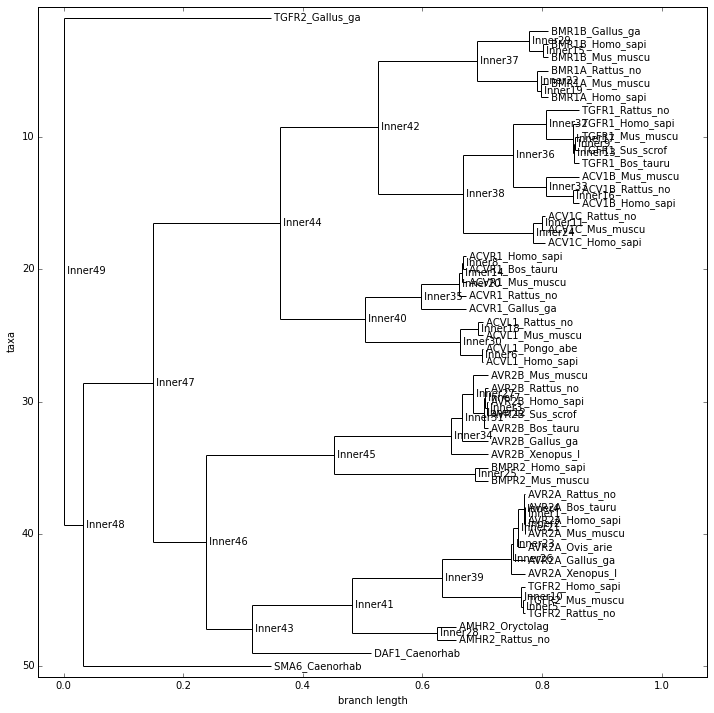

In [29]:
from Bio import Phylo
# now draw the tree, try out these three methods:
Phylo.draw_ascii(tree)
plt.figure(figsize=(12,12))
ax=plt.subplot(111)
Phylo.draw(tree,axes=ax)
# to use this, you need to have the package networkx installed:
#Phylo.draw_graphviz(tree)
